In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Leemos una imagen

In [4]:
img = cv2.imread(r'../data/test/3100226504_c0d4f1e3f1.jpg')
img.shape

x = [[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]
kernel = np.array(x)

out_image = cv2.filter2D(img,-1,kernel)
out_image.shape

(375, 500, 3)

(375, 500, 3)

numpy.ndarray

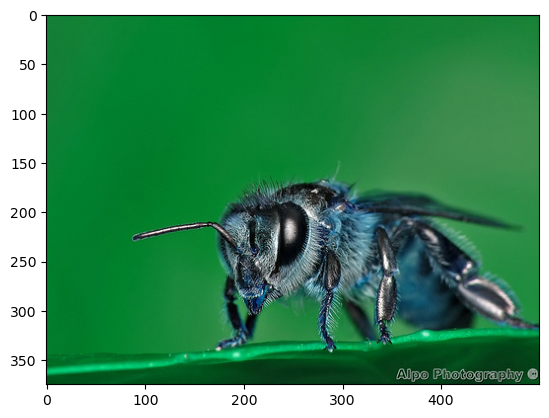

In [5]:
type(img)
plt.imshow(img)

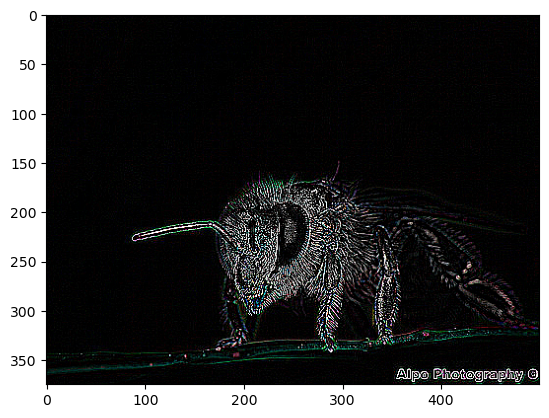

In [6]:
plt.imshow(out_image)

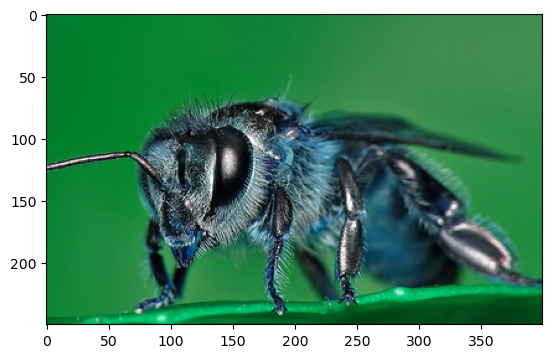

In [7]:
plt.imshow(img[100:350,100:500,:])

(250, 400, 3)

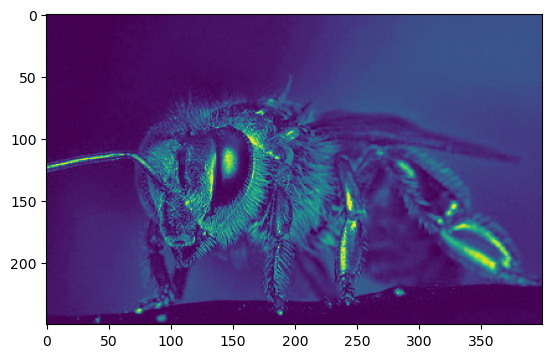

In [8]:
img = img[100:350,100:500,:]
img = img / 255
img.shape
plt.imshow(img[:,:,0])

In [9]:
img2 = img.reshape(1,3,250,400)
type(img2)
img2.shape

numpy.ndarray

(1, 3, 250, 400)

In [11]:
img3 = torch.FloatTensor(np.asarray(img2)).numpy()
img3 = torch.tensor(img3)
type(img3)
img3.shape

torch.Tensor

torch.Size([1, 3, 250, 400])

## Primera convolución

3 canales de entrada, 3 canales de salida y un kernel 3x3

In [12]:
conv1 = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=0)
out = conv1(img3)
out.shape

out_1 =out.squeeze(0).detach().numpy()
out_1.shape
out_1[1,:,:].shape

torch.Size([1, 3, 248, 398])

(3, 248, 398)

(248, 398)

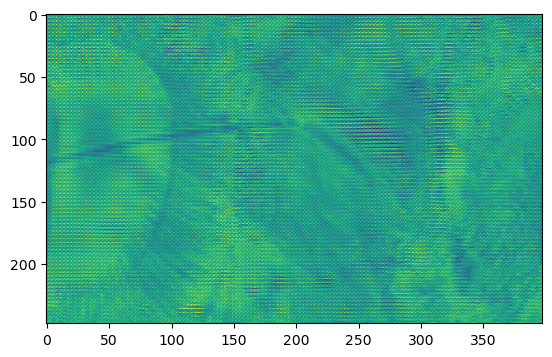

In [13]:
plt.imshow(out_1[0,:,:])

## Segunda convolución

3 canales de entrada, 6 canales de salida y un kernel 3x3

In [22]:
conv2 = torch.nn.Conv2d(in_channels=3, out_channels=24, kernel_size=3, stride=2, padding=1, bias=False)
out2 = conv2(out)
out2.shape

out_2 =out2.squeeze(0).detach().numpy()
out_2.shape
out_2[1,:,:].shape

torch.Size([1, 24, 124, 199])

(24, 124, 199)

(124, 199)

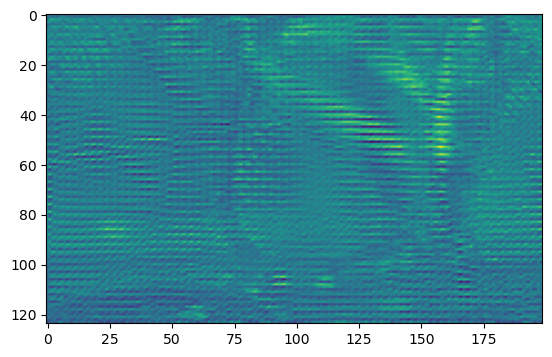

In [20]:
plt.imshow(out_2[0,:,:])

## Tercera convolución

6 canales de entrada, 12 canales de salida y un kernel 3x3

In [25]:
conv3 = torch.nn.Conv2d(in_channels=24, out_channels=24, kernel_size=3, stride=1, padding=1, bias=False)
out3 = conv3(out2)
out3.shape

out_3 =out3.squeeze(0).detach().numpy()
out_3.shape
out_3[1,:,:].shape

torch.Size([1, 24, 124, 199])

(24, 124, 199)

(124, 199)

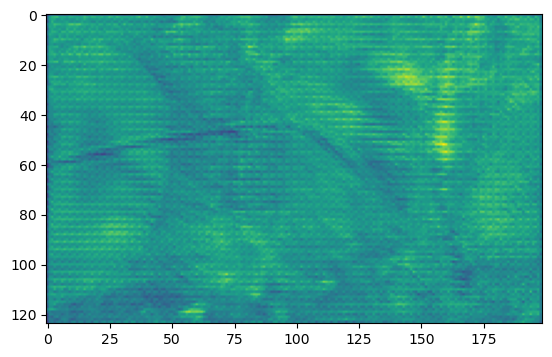

In [26]:
plt.imshow(out_3[0,:,:])

In [18]:
conv2

Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))